This file is used to explore the characteristics of the air dataset. Incldues various visualizations for showing system instabilities.  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import os as os

# Loading data from TopticaPro

In [3]:
df = pd.read_csv('Data\\Air_pulses_TopticaPro\\01_air_N2.pulse.csv')

df.describe()

,Time_abs/ps,Signal/nA
count,4001.000000,4001.000000
mean,1280.000000,0.054017
std,57.756677,12.585471
min,1180.000000,-185.227647
25%,1230.000000,-0.573868
50%,1280.000000,0.005570
75%,1330.000000,0.600658
max,1380.000000,305.173615


In [4]:
# This step was nessesary due to issues with having backslashes in the column names
df = df.rename(columns={ df.columns[0]: "time", df.columns[1]: "signal" })
df.describe()

,time,signal
count,4001.000000,4001.000000
mean,1280.000000,0.054017
std,57.756677,12.585471
min,1180.000000,-185.227647
25%,1230.000000,-0.573868
50%,1280.000000,0.005570
75%,1330.000000,0.600658
max,1380.000000,305.173615


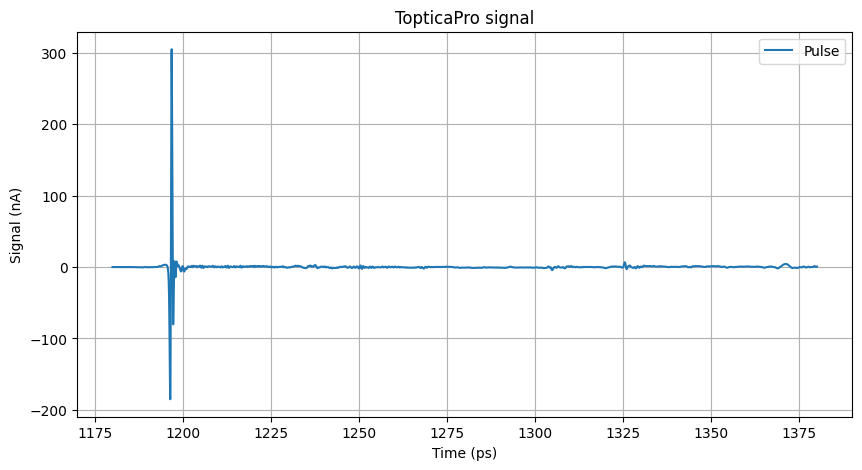

In [5]:
x = df['time'].values
y = df['signal'].values

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Pulse')

plt.xlabel("Time (ps)")
plt.ylabel("Signal (nA)")
plt.title("TopticaPro signal")
plt.legend()
plt.grid(True)
plt.show()

The above is difficult to visualize due to the long tail. It is therefore best to zoom into the relevant region:

In [6]:
# The following code visualizes a pulse by zooming into the area of the peaks
# Plotting the pulse without doing this results in a hard-to-read plot due to the long tail of noise in the data
# The zoom is performed by centering on the middle index between the min and max peaks

def plotPulse(x, y, title, x_label, y_label, window_size = 50):
    min_index = np.argmin(y)
    max_index = np.argmax(y)
    middle_index = math.floor((min_index+max_index)/2)

    zoom_start = middle_index - window_size
    zoom_end = middle_index + window_size

    plt.figure(figsize=(10, 5))
    plt.plot(x[zoom_start:zoom_end], y[zoom_start:zoom_end], label='Zoomed-in Signal')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


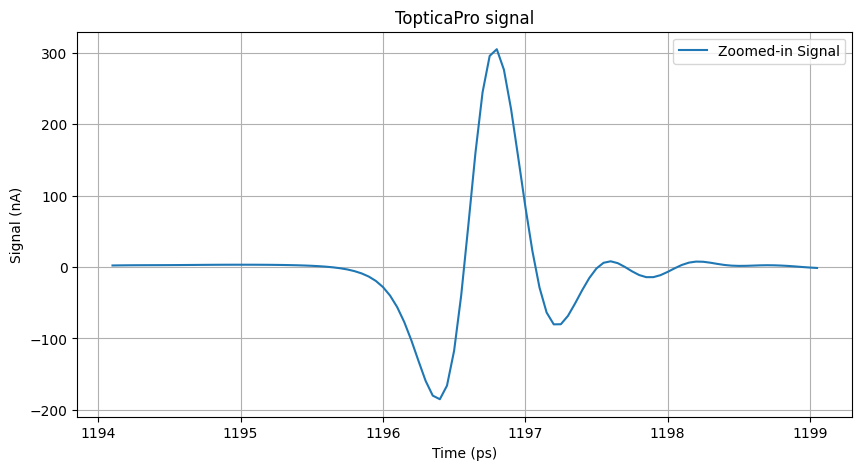

In [7]:
plotPulse(x, y, 'TopticaPro signal', 'Time (ps)', 'Signal (nA)')

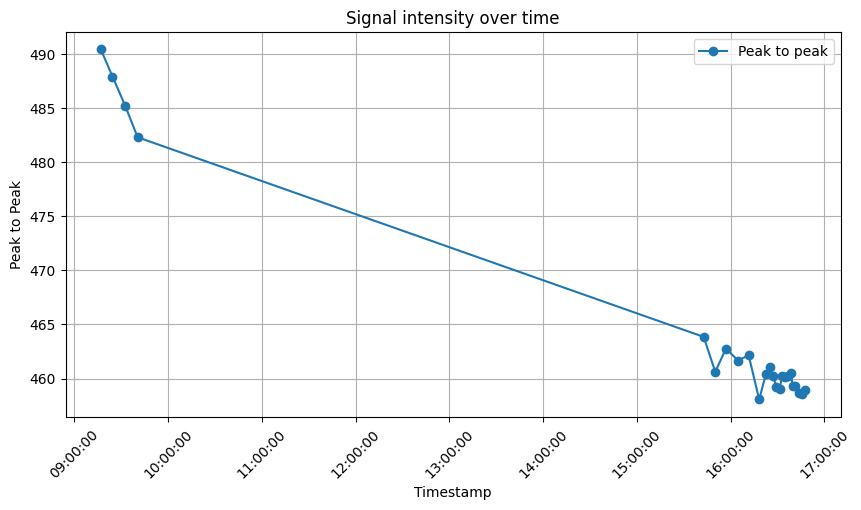

In [8]:
from datetime import datetime
from matplotlib.dates import DateFormatter

# Loading all TopticaPro data for plotting the intensity of the signal over time
path_to_data = "Data\\Air_pulses_TopticaPro\\"
files = os.listdir(path_to_data)

files.remove("READ_ME.txt")

dataframes = [pd.read_csv(path_to_data + file) for file in files]
signals = [df[df.columns[1]] for df in dataframes]
peak_to_peak = [signal.max() - signal.min() for signal in signals]
timestamps = [os.stat(path_to_data + file).st_mtime for file in files]
timestamps = [datetime.fromtimestamp(timestamp) for timestamp in timestamps]

plt.figure(figsize=(10, 5))
plt.plot(timestamps, peak_to_peak, 'o-', label='Peak to peak')

date_form = DateFormatter("%H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.ylabel("Peak to Peak")
plt.title("Signal intensity over time")
plt.legend()
plt.grid(True)
plt.show()
    

The first couple of timestamps can be seen as outliers as they are taken far from the rest. A better visualization is made by discarding these initial timestamps. 

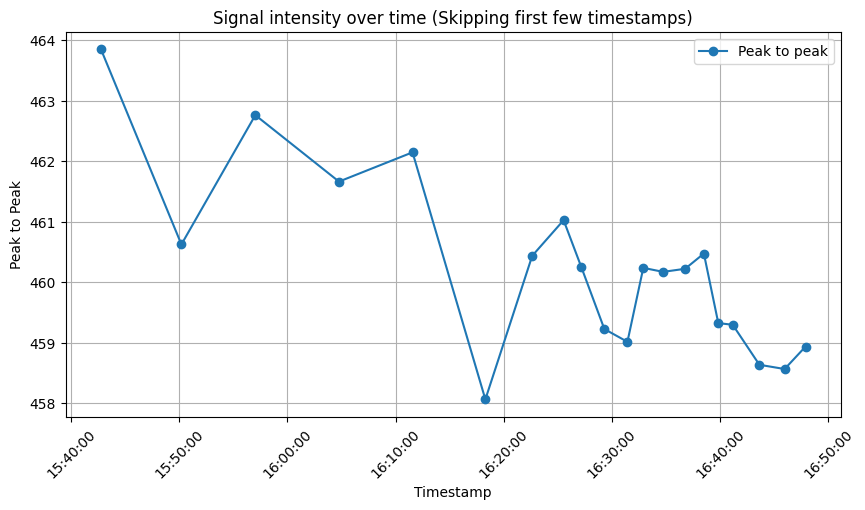

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(timestamps[4:], peak_to_peak[4:], 'o-', label='Peak to peak')

date_form = DateFormatter("%H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.ylabel("Peak to Peak")
plt.title("Signal intensity over time (Skipping first few timestamps)")
plt.legend()
plt.grid(True)
plt.show()

As evident by the plots above, the TopticalPro system is not robust through time. The signal intensity decreases as a function of time.

Maybe draw regression lines? trying with linear regression and with polynomial regression

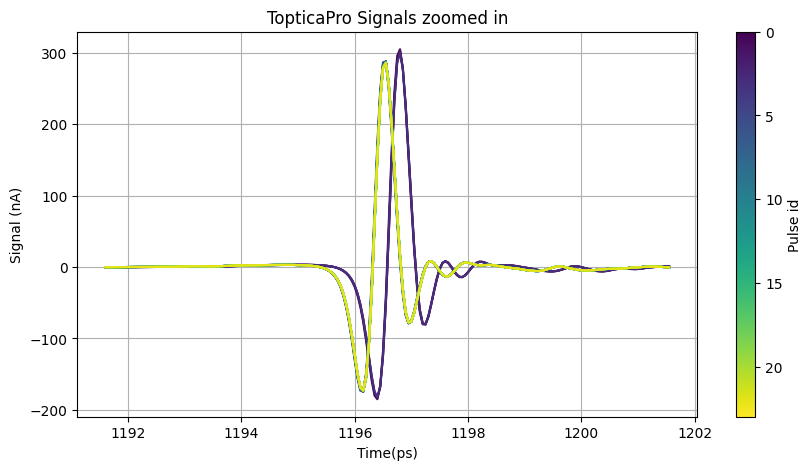

In [10]:
# Plotting pulses on same time axis to see if TopticaPro is robust in location on time axis

# The following lines are used for the zoom
x_zoom = dataframes[0][dataframes[0].columns[0]]
y_zoom = dataframes[0][dataframes[0].columns[1]]
min_index = np.argmin(y_zoom)
max_index = np.argmax(y_zoom)
middle_index = math.floor((min_index + max_index) / 2)
zoom_start = middle_index - 100
zoom_end = middle_index + 100
fig, ax = plt.subplots(figsize=(10, 5))

num_plots = len(dataframes)

cmap = plt.get_cmap('viridis')

for i, pulse in enumerate(signals):
    color = cmap(i / num_plots)
    x = dataframes[0][dataframes[0].columns[0]]
    y = pulse
    ax.plot(x[zoom_start:zoom_end], y[zoom_start:zoom_end], color=color, label=f'Pulse {i}')

ax.set_xlabel("Time(ps)")
ax.set_ylabel("Signal (nA)")
ax.set_title("TopticaPro Signals zoomed in")
ax.grid(True)

# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([0, num_plots-1])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Pulse id')
cbar.ax.invert_yaxis()  # Invert the colorbar
plt.show()

The above shows that the TopticaPro is fairly robust when looking at position on time axis. Most of the signals are almost exactly on top of another. The exeption is the first few signals that were taken far earlier than the rest. They do not lie on top of the other ones. The reason for this is unknown.

# Loading data from TopticaSmart

In [11]:
import pickle as pickle

In [12]:
with open("Data\\Air_pulses_TopticaSmart\\01_air_N2.pkl", 'rb') as file:
    data = pickle.load(file)

data

{'pulse': [{'forward_scan': {'time': [0.0,
     3.766842105263158e-14,
     7.533684210526316e-14,
     1.1300526315789474e-13,
     1.5067368421052632e-13,
     1.8834210526315792e-13,
     2.2601052631578948e-13,
     2.6367894736842105e-13,
     3.0134736842105265e-13,
     3.3901578947368424e-13,
     3.7668421052631583e-13,
     4.1435263157894737e-13,
     4.5202105263157897e-13,
     4.896894736842105e-13,
     5.273578947368421e-13,
     5.650263157894737e-13,
     6.026947368421053e-13,
     6.403631578947369e-13,
     6.780315789473685e-13,
     7.157000000000001e-13,
     7.533684210526317e-13,
     7.910368421052632e-13,
     8.287052631578947e-13,
     8.663736842105263e-13,
     9.040421052631579e-13,
     9.417105263157894e-13,
     9.79378947368421e-13,
     1.0170473684210526e-12,
     1.0547157894736842e-12,
     1.0923842105263158e-12,
     1.1300526315789474e-12,
     1.167721052631579e-12,
     1.2053894736842106e-12,
     1.2430578947368422e-12,
     1.28072631578

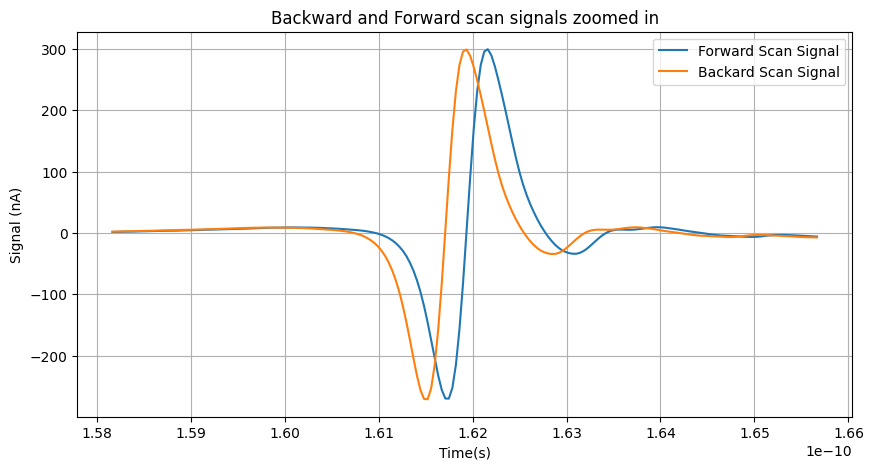

In [13]:
#Comparing forward/backward scan for the same pulse

x_forward = data['pulse'][0]['forward_scan']['time']
y_forward = data['pulse'][0]['forward_scan']['signal']

x_backward = data['pulse'][0]['backward_scan']['time']
y_backward = data['pulse'][0]['backward_scan']['signal']

min_index = np.argmin(y_forward)
max_index = np.argmax(y_forward)
middle_index = math.floor((min_index+max_index)/2)

zoom_start = middle_index - 100
zoom_end = middle_index + 100

plt.figure(figsize=(10, 5))
plt.plot(x_forward[zoom_start:zoom_end], y_forward[zoom_start:zoom_end], label='Forward Scan Signal')
plt.plot(x_backward[zoom_start:zoom_end], y_backward[zoom_start:zoom_end], label='Backard Scan Signal')


plt.xlabel("Time(s)")
plt.ylabel("Signal (nA)")
plt.title("Backward and Forward scan signals zoomed in")
plt.legend()
plt.grid(True)
plt.show()


It seems like the forward/backward pulses are identical but shifted on the time axis.

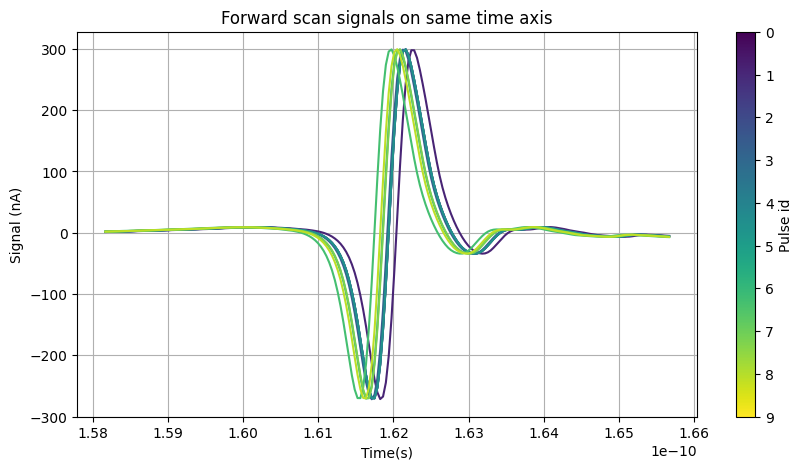

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math

# The following lines are used for the zoom
x_forward = data['pulse'][0]['forward_scan']['time']
y_forward = data['pulse'][0]['forward_scan']['signal']
min_index = np.argmin(y_forward)
max_index = np.argmax(y_forward)
middle_index = math.floor((min_index + max_index) / 2)
zoom_start = middle_index - 100
zoom_end = middle_index + 100
fig, ax = plt.subplots(figsize=(10, 5))

num_plots = len(data['pulse'])

cmap = plt.get_cmap('viridis')

for i, pulse in enumerate(data['pulse']):
    color = cmap(i / num_plots)
    x = pulse['forward_scan']['time']
    y = pulse['forward_scan']['signal']
    ax.plot(x[zoom_start:zoom_end], y[zoom_start:zoom_end], color=color, label=f'Pulse {i}')

ax.set_xlabel("Time(s)")
ax.set_ylabel("Signal (nA)")
ax.set_title("Forward scan signals on same time axis")
ax.grid(True)

# Adding colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([0, num_plots-1])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Pulse id')
cbar.ax.invert_yaxis()  # Invert the colorbar
plt.show()


Looks like the pulses are shiftet randomly along the time axis. This matches what Lorenza said about the TopicaSmart system being unstable in terms of location on time axis. 

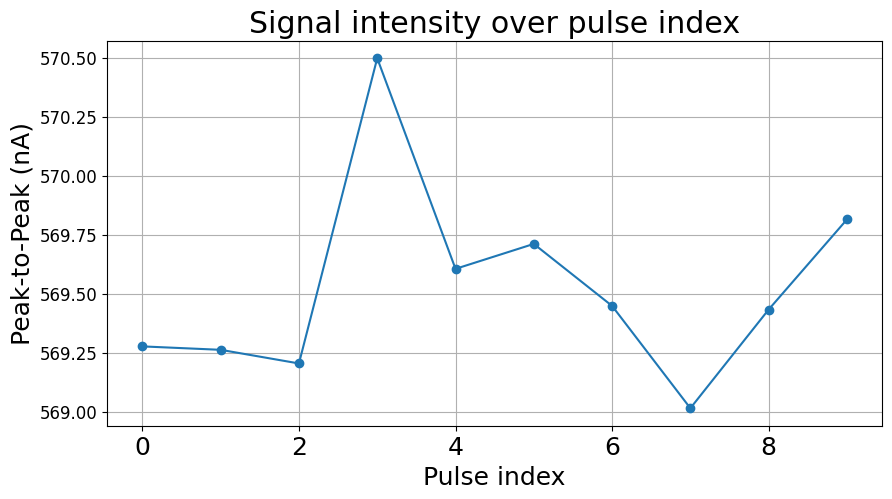

In [35]:
# looking at signal intensity through time
# first by looking at the 10 consecutive pulses

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})


pulses = data['pulse']
signals = pd.DataFrame([pulse['forward_scan']['signal'] for pulse in pulses]).transpose()
signal_intensities = [signals[column].max() - signals[column].min() for column in signals]

plt.figure(figsize=(10, 5))


plt.plot(signal_intensities, 'o-', label='Signal Intensity')

plt.xlabel("Pulse index")
plt.ylabel("Peak-to-Peak (nA)")
plt.yticks(fontsize=12)
plt.title("Signal intensity over pulse index")
plt.grid(True)
plt.show()

Seem like there is no correlation between time and signal intensity. This means that the TopticaSmart system is stable in regards to signal intensity over time. Or at least, that there is no correlation between time and intensity.

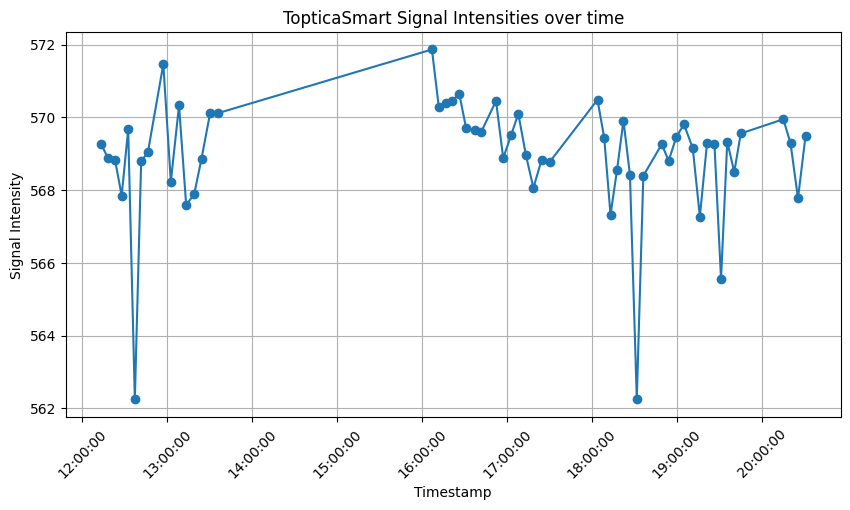

In [80]:
# Same thing as above but for all the files

# Loading all TopticaPro data for plotting the intensity of the signal over time
path_to_data = "Data\\Air_pulses_TopticaSmart\\"
files = os.listdir(path_to_data)

files.remove("READ_ME.txt")

data = []

for file in files:
    with open("Data\\Air_pulses_TopticaSmart\\" + file, 'rb') as f:
        data.append(pickle.load(f))


pulses = [d['pulse'][0]['forward_scan']['signal'] for d in data]
timestamps = [d['time'] for d in data]
timestamps = [datetime.fromisoformat(timestamp) for timestamp in timestamps]
signals = pd.DataFrame(pulses).transpose()

signal_intensities = [signals[column].max() - signals[column].min() for column in signals]

plt.figure(figsize=(10, 5))
plt.plot(timestamps, signal_intensities, 'o-')

date_form = DateFormatter("%H:%M:%S")
plt.gca().xaxis.set_major_formatter(date_form)
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.ylabel("Signal Intensity")
plt.title("TopticaSmart Signal Intensities over time")
plt.grid(True)
plt.show()

The same is true when looking at pulses over a longer time period. In this case around 7 hours.

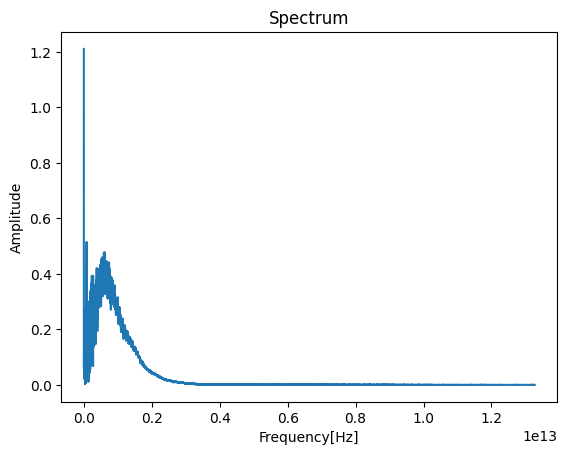

In [100]:
from scipy.fft import rfft, rfftfreq
# Performing FFT on single signal

signal = data[0]['pulse'][0]['forward_scan']['signal'].copy()
time = data[0]['pulse'][0]['forward_scan']['time'].copy()
sample_rate = 1/time[1]

yf = np.abs(rfft(signal))/(len(signal)/2)

xf = rfftfreq(len(signal), 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.title('Spectrum')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.show()